In [1]:
from shapely import Point , LineString , LinearRing , MultiPolygon

# object.has_z

### 如果几何要素不仅有x和y，而且还有z坐标，则返回True。

In [2]:
Point(0, 0).has_z

False

In [3]:
Point(0, 0, 0).has_z

True

# object.is_ccw

### 如果坐标按逆时针顺序排列，则返回True（以正面标记的面积来框定区域）。该方法只适用于LinearRing对象。

In [4]:
LinearRing([(1,0), (1,1), (0,0)]).is_ccw

True

### 非预期方向的环可以通过以下代码进行翻转操作：

In [5]:
ring = LinearRing([(0,0), (1,1), (1,0)])

In [6]:
ring.is_ccw

False

In [7]:
ring2 = LinearRing(list(ring.coords)[::-1]) # 将坐标序列反向排列

In [8]:
ring2.is_ccw

True

# object.is_empty

### 如果要素的内部和边界为空集，则返回True。

In [9]:
Point().is_empty

True

In [10]:
Point(0, 0).is_empty

False

### 使用python内置模块operator中的attrgetter()函数，一元谓词is_empty 能够用作python内置函数filter()的谓词，来对列表中的对象进行批量判断和过滤。

In [11]:
from operator import attrgetter

empties = filter(attrgetter('is_empty'), [Point(), Point(0, 0)])

In [12]:
list(empties)

[<POINT EMPTY>]

# object.is_ring

### 如果要素是一个闭合的、简单的LineString，返回True。一个封闭的要素的边界与空集重合。

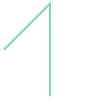

In [13]:
LineString([(0, 0), (1, 1), (1, -1)])

In [14]:
LineString([(0, 0), (1, 1), (1, -1)]).is_ring

False

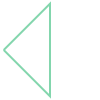

In [15]:
LinearRing([(0, 0), (1, 1), (1, -1)])

In [16]:
LinearRing([(0, 0), (1, 1), (1, -1)]).is_ring

True

# object.is_simple

### 如果该要素不自相交，则返回True。

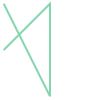

In [17]:
LineString([(0, 0), (1, 1), (1, -1), (0, 1)])

In [18]:
LineString([(0, 0), (1, 1), (1, -1), (0, 1)]).is_simple

False

# object.is_valid

### 如果要素是”有效 “的，则返回True。

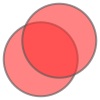

In [19]:
Polygons = MultiPolygon([Point(0, 0).buffer(2.0), Point(1, 1).buffer(2.0)]) # buffer()——缓冲操作
Polygons

In [20]:
Polygons.is_valid

False

### is_valid谓词可以用来编写一个验证装饰器，可以确保只有有效的对象从构造函数返回。

In [21]:
# 标准库 functools 中的 wrap 函数用于包装函数, 不改变原有函数的功能, 仅改变原有函数的一些属性, 例如 __name__, __doc__, __annotations__ 等属性
from functools import wraps
from shapely.errors import TopologicalError
    
def validate(func):
    @wraps(func)
    def wrapper(*args , **kwargs):
        ob = func(*args , **kwargs)
        if not ob.is_valid:
            raise TopologicalError("给出的参数不能确定一个有效的几何对象!")
        return ob
    return wrapper

In [22]:
@validate
def ring(coordinates):
    return LinearRing(coordinates)

In [23]:
coords = [(0, 0), (1, 1), (1, -1), (0, 1)]

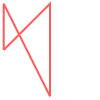

In [24]:
LinearRing(coords)

In [25]:
ring(coords)

TopologicalError: 给出的参数不能确定一个有效的几何对象!

In [26]:
coords2 = [(0, 0), (1, 1), (2, 0), (1, -1)]

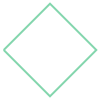

In [27]:
ring(coords2)